c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SGDClassifier_score  => 1.0

LineraDiscriminanteAnalysis_Score => 1.0

KNeighborsClassifier => 0.9666666666666667

 LinearSvc => 1.0

 VotingClassifier_Score => 1.0

 Bagging Classifier_KNC_score => 1.0

 Bagging Classifier_LDA_score => 1.0

 RandomForestlassifier_Score => 0.9666666666666667

 AdaBoostClassifier_score => 0.9

 GradientBoostingClassifier_score => 1.0

StackingClassifier_score =>

c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\packard bell\ap

 0.9666666666666667


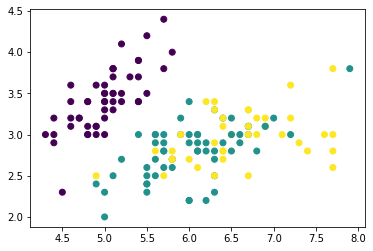

In [33]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.discriminant_analysis import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.linear_model import *
import matplotlib.pyplot as plt 
 
                        ## windsom of the crowd ##

#data
iris=load_iris()
x=iris.data
y=iris.target 

##partitonement
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

## modeles ##
modele1=SGDClassifier(random_state=0)
modele2=LinearDiscriminantAnalysis()
modele3=KNeighborsClassifier()
modele4=LinearSVC()

for mod in (modele1,modele2,modele3,modele4):
    mod.fit(xtrain,ytrain)

print("SGDClassifier_score  =>",modele1.score(xtest,ytest))
print("")
print("LineraDiscriminanteAnalysis_Score =>",modele2.score(xtest,ytest))
print("")
print("KNeighborsClassifier =>",modele3.score(xtest,ytest))
print("")
print(" LinearSvc =>",modele4.score(xtest,ytest))

                         ######## modele_principal => Votingclassifier,VotingRegressor #####
modele_princip=VotingClassifier([('lda',modele2),('KNC',modele3),('svc',modele4),('SGD',modele1)],voting='hard') ##voting hard: votre sur les predictions
                                                                        #voting='soft' vote sur la probabilites de chaque classe
modele_princip.fit(xtrain,ytrain)
print("")
print(" VotingClassifier_Score =>",modele_princip.score(xtest,ytest))


                        ############# bagging : BaggingClassifier , BaggingRegressor (overfitting) #################
modele5=BaggingClassifier(KNeighborsClassifier(),n_estimators=100)
modele5.fit(xtrain,ytrain)
print("")
print( " Bagging Classifier_KNC_score =>",modele5.score(xtest,ytest))

modele6=BaggingClassifier(LinearDiscriminantAnalysis(),n_estimators=100)
modele6.fit(xtrain,ytrain)
print("")
print( " Bagging Classifier_LDA_score =>",modele6.score(xtest,ytest))

modele7=RandomForestClassifier(n_estimators=100) #pas besoin d'estimateur de base (estimate_base=arbre_decision)
modele7.fit(xtrain,ytrain)
print("")
print( " RandomForestlassifier_Score =>",modele7.score(xtest,ytest))


             ########## Boosting-AdaBoostClassifier,GradientBoostingClassifier (underfitting)  ############

modele8=AdaBoostClassifier(n_estimators=100)
modele8.fit(xtrain,ytrain)
print("")
print( " AdaBoostClassifier_score =>",modele8.score(xtest,ytest))

modele9=GradientBoostingClassifier(n_estimators=100)
modele9.fit(xtrain,ytrain)
print("")
print( " GradientBoostingClassifier_score =>",modele9.score(xtest,ytest))
                
    
                        ############ stacking :StackingClassifier,stackingRgerssor ###################
modele10=modele_princip=StackingClassifier([('lda',modele2),('KNC',modele3),('svc',modele4),('SGD',modele1)],final_estimator=KNeighborsClassifier())
modele10.fit(xtrain,ytrain)
print("")
print( "StackingClassifier_score =>",modele10.score(xtest,ytest))

fig=plt.figure()
plt.scatter(x[:,0],x[:,1],c=modele10.predict(x))